In [37]:
# Import necessary libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import PolynomialFeatures
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import train_test_split


In [38]:
# Load your dataset
data = pd.read_csv('online_shoppers_intention.csv')  # Replace with the actual path to your CSV file

# Display the first few rows to confirm the data is loaded correctly
print(data.head())


   Administrative  Administrative_Duration  Informational  \
0               0                      0.0              0   
1               0                      0.0              0   
2               0                      0.0              0   
3               0                      0.0              0   
4               0                      0.0              0   

   Informational_Duration  ProductRelated  ProductRelated_Duration  \
0                     0.0               1                 0.000000   
1                     0.0               2                64.000000   
2                     0.0               1                 0.000000   
3                     0.0               2                 2.666667   
4                     0.0              10               627.500000   

   BounceRates  ExitRates  PageValues  SpecialDay Month  OperatingSystems  \
0         0.20       0.20         0.0         0.0   Feb                 1   
1         0.00       0.10         0.0         0.0   Feb   

In [39]:
# Define input (X) and output (y)
X = data[['ProductRelated_Duration']].values  # Use 'ProductRelated_Duration' as feature
y = data['BounceRates'].values  # Use 'BounceRates' as target variable


In [40]:
# Split data into training and test sets (80:20)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


In [41]:
# Define training sizes and polynomial degrees
training_sizes = [100, 1000, 5000, 8000]
degrees = [1, 2, 3, 4]


In [42]:
def train_and_evaluate(degree, X_train_sample, y_train_sample, X_test, y_test):
    # Transform features to polynomial features of the given degree
    poly_features = PolynomialFeatures(degree=degree, include_bias=False)
    X_train_poly = poly_features.fit_transform(X_train_sample)
    X_test_poly = poly_features.transform(X_test)

    # Train the linear regression model
    model = LinearRegression()
    model.fit(X_train_poly, y_train_sample)

    # Predict and calculate MSE for train and test sets
    y_train_pred = model.predict(X_train_poly)
    y_test_pred = model.predict(X_test_poly)
    train_mse = mean_squared_error(y_train_sample, y_train_pred)
    test_mse = mean_squared_error(y_test, y_test_pred)
    
    return train_mse, test_mse


In [43]:
# Initialize lists to store errors
train_errors = {d: [] for d in degrees}
test_errors = {d: [] for d in degrees}


In [44]:
# Loop through each polynomial degree
for degree in degrees:
    print(f"Training for Polynomial Degree: {degree}")
    
    # Loop through each training size
    for size in training_sizes:
        print(f"  Training Size: {size}")
        
        train_errors_for_size, test_errors_for_size = [], []
        
        # Generate 40 random training sets to calculate confidence intervals
        for i in range(40):
            # Sample the training data
            X_train_sample, _, y_train_sample, _ = train_test_split(
                X_train, y_train, train_size=size, random_state=i  # Fixed random state for reproducibility
            )

            # Train model and calculate errors
            train_mse, test_mse = train_and_evaluate(degree, X_train_sample, y_train_sample, X_test, y_test)
            train_errors_for_size.append(train_mse)
            test_errors_for_size.append(test_mse)

        # Store the mean of errors for each training size and degree
        mean_train_error = np.mean(train_errors_for_size)
        mean_test_error = np.mean(test_errors_for_size)

        train_errors[degree].append(mean_train_error)
        test_errors[degree].append(mean_test_error)
        
        # Debugging prints to verify error values
        print(f"    Mean Train Error for size {size}: {mean_train_error}")
        print(f"    Mean Test Error for size {size}: {mean_test_error}")


Training for Polynomial Degree: 1
  Training Size: 100
    Mean Train Error for size 100: 0.0022310438490441677
    Mean Test Error for size 100: 0.002679100373197491
  Training Size: 1000
    Mean Train Error for size 1000: 0.00219541256770232
    Mean Test Error for size 1000: 0.0026439354339311376
  Training Size: 5000
    Mean Train Error for size 5000: 0.002188381090687856
    Mean Test Error for size 5000: 0.0026379505171748065
  Training Size: 8000
    Mean Train Error for size 8000: 0.002185143721801712
    Mean Test Error for size 8000: 0.0026377975311810747
Training for Polynomial Degree: 2
  Training Size: 100
    Mean Train Error for size 100: 0.002109002021670986
    Mean Test Error for size 100: 0.007377454361951452
  Training Size: 1000
    Mean Train Error for size 1000: 0.0021272862416226584
    Mean Test Error for size 1000: 0.002676728570151124
  Training Size: 5000
    Mean Train Error for size 5000: 0.0021436223438856547
    Mean Test Error for size 5000: 0.0025934

In [45]:
# Final structure check
print("Final Train Errors:", train_errors)
print("Final Test Errors:", test_errors)


Final Train Errors: {1: [np.float64(0.0022310438490441677), np.float64(0.00219541256770232), np.float64(0.002188381090687856), np.float64(0.002185143721801712)], 2: [np.float64(0.002109002021670986), np.float64(0.0021272862416226584), np.float64(0.0021436223438856547), np.float64(0.0021500108015684158)], 3: [np.float64(0.001986160093328169), np.float64(0.0020478055943355103), np.float64(0.0020840845109795234), np.float64(0.002096005342290201)], 4: [np.float64(0.0018542069147245769), np.float64(0.001966842872451364), np.float64(0.0020225458128242516), np.float64(0.0020443860594302984)]}
Final Test Errors: {1: [np.float64(0.002679100373197491), np.float64(0.0026439354339311376), np.float64(0.0026379505171748065), np.float64(0.0026377975311810747)], 2: [np.float64(0.007377454361951452), np.float64(0.002676728570151124), np.float64(0.0025934906993716972), np.float64(0.0025924566584353817)], 3: [np.float64(1.22105070561972), np.float64(0.005915210748720632), np.float64(0.002562823196506597)

In [46]:
def plot_confidence_intervals(training_sizes, train_errors, test_errors, degree):
    plt.figure(figsize=(10, 6))
    plt.errorbar(training_sizes, train_errors[degree], yerr=np.std(train_errors[degree]), fmt='o-', label="Train Error")
    plt.errorbar(training_sizes, test_errors[degree], yerr=np.std(test_errors[degree]), fmt='s-', label="Test Error")
    plt.xlabel("Training Set Size")
    plt.ylabel("Mean Squared Error")
    plt.title(f"Training Set Size vs Error (Polynomial Degree {degree})")
    plt.legend()
    plt.show()


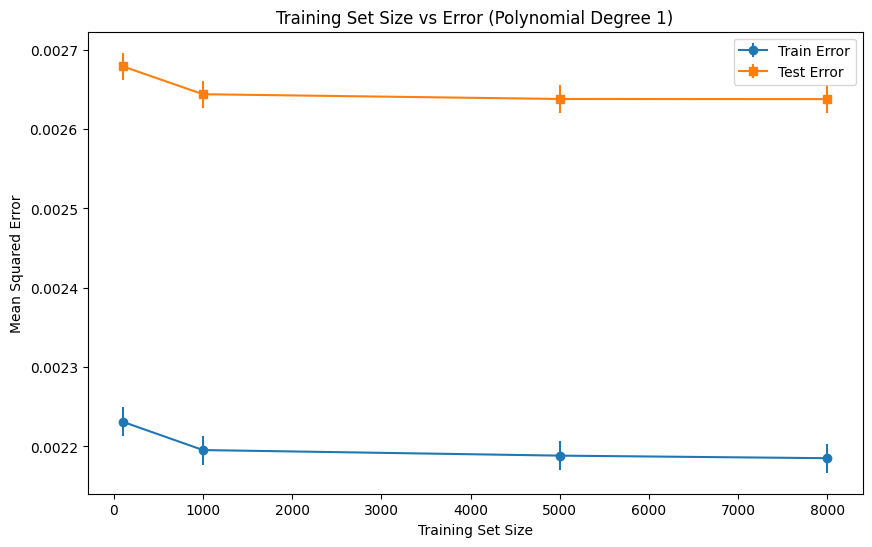

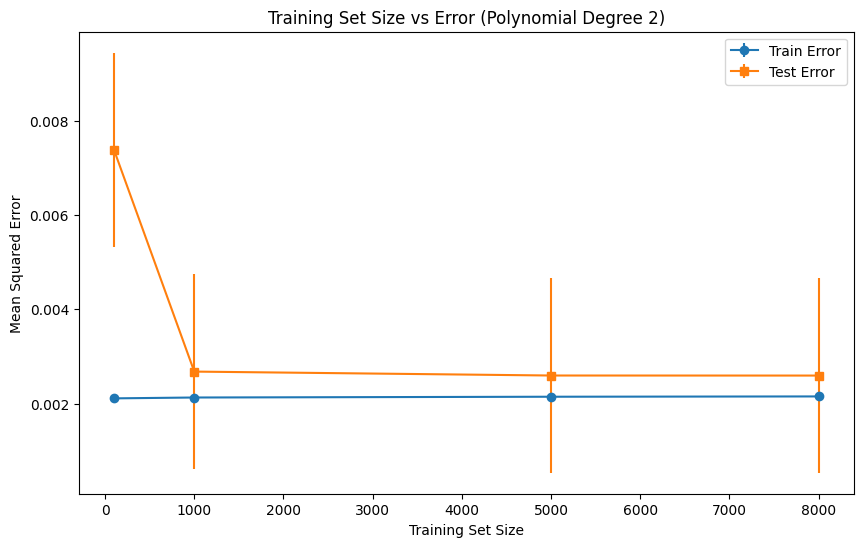

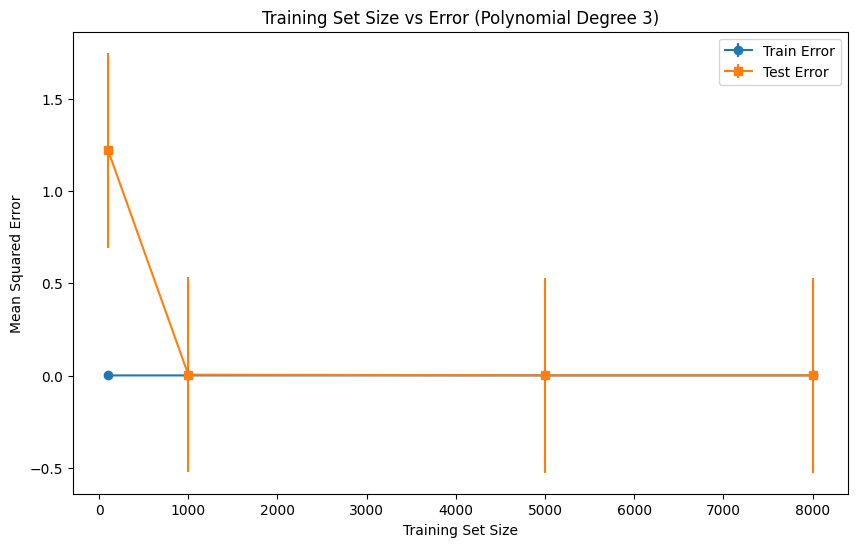

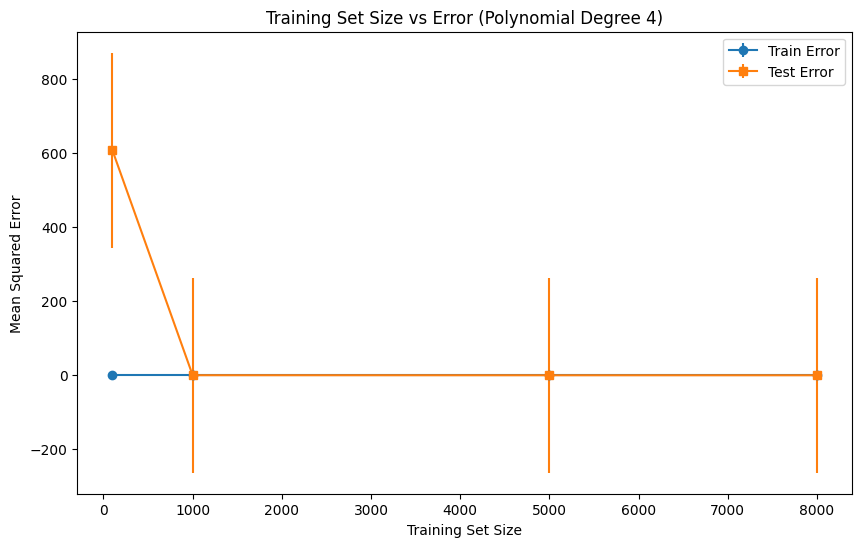

In [48]:
# Plot for each degree
for degree in degrees:
    plot_confidence_intervals(training_sizes, train_errors, test_errors, degree)
